In [1]:
# Librerías
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading Dataset
df = pd.read_csv("dataset.csv")

In [12]:
# Data loading
print("Reading Dataset")
print(df.iloc[0:8,:])

maxsize = 100
x = df.iloc[0:maxsize,1:15].values
y = df.iloc[0:maxsize,15].values

print("Values detected")
print("X => \n", x[:5])
print("Y => \n", y[:5])

Reading Dataset
   Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   
5           5  1654733336          20.073        54.12          0        400   
6           6  1654733337          20.088        53.61          0        400   
7           7  1654733338          20.103        53.20          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        187

In [13]:
# Data Spliting
print("Spliting train data and test data")
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

Spliting train data and test data


In [14]:
# Preprocessing
print("Preprocessing data")
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

from sklearn.decomposition import KernelPCA 

Preprocessing data


In [15]:
# KPCA 
components = 2
print(f"Aplying KPCA with {components} components")
kpca = KernelPCA(n_components=components,kernel="rbf")
xtrain = kpca.fit_transform(xtrain)
xtest = kpca.fit(xtest)

print("Obtained results => \n",xtrain[:5])

Aplying KPCA with 2 components
Obtained results => 
 [[-0.07891543  0.55757111]
 [-0.17340956  0.28759429]
 [ 0.4654895  -0.06369721]
 [-0.52655826 -0.24499383]
 [-0.10815476  0.53100554]]


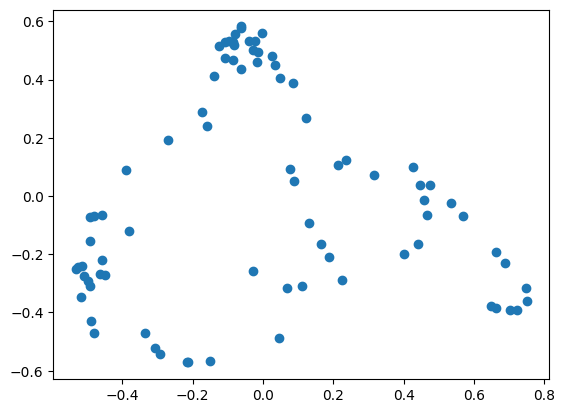

In [16]:
plt.scatter(xtrain[:,0],xtrain[:,1])